In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DataFrames Overview

1. **agency:** Contains information about metro agency.
2. **calendar:** Defines the service dates for metro service.
3. **fare_attribute:** Contains fare information.    
4. **fare_rule:** Defines rules for applying fares.
5. **route:** Contains information about routes.
6. **stop_time:** Contains information about stop times for trips.
7. **stop:** Contains information about stops.
8. **trip:** Contains information about trips.

## Data Extraction and Exploration

In [5]:
# reads first few rows of csv file

agency = pd.read_csv('agency.txt')
agency.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_fare_url,agency_email,agency_phone
0,HMRL,Hyderabad Metro Rail,https://www.ltmetro.com,Asia/Kolkata,en,https://www.ltmetro.com/ticketing/,customerservice@ltmetro.com,+91-4023332555


### Metadata of 'agency' DataFrame: 
1. **agency_id:** A unique identifier for each agency.
2. **agency_name:** The official name of the transportation agency.
3. **agency_url:** The official website of the agency.
4. **agency_timezone:** The timezone in which the agency operates.
5. **agency_lang:** The primary language used by the agency.
6. **agency_fare_url:** A link to the agency's fare information.
7. **agency_email:** The contact email address for the agency.
8. **agency_phone:** The contact phone number for the agency.

In [7]:
# creates a copy of original data

agency_data = agency.copy()

In [8]:
# returns the full summary of dataframe

agency.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   agency_id        1 non-null      object
 1   agency_name      1 non-null      object
 2   agency_url       1 non-null      object
 3   agency_timezone  1 non-null      object
 4   agency_lang      1 non-null      object
 5   agency_fare_url  1 non-null      object
 6   agency_email     1 non-null      object
 7   agency_phone     1 non-null      object
dtypes: object(8)
memory usage: 196.0+ bytes


In [9]:
# saves the DataFrame to a CSV file named 'agency.csv'

agency.to_csv('agency.csv', index=False) 

In [10]:
calendar = pd.read_csv('calendar.txt')
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,WK,1,1,1,1,1,1,1,20240625,20300101
1,SA,0,0,0,0,0,1,0,20240625,20300101
2,SU,0,0,0,0,0,0,1,20240625,20300101


### Metadata of 'calendar' DataFrame:
1. **service_id:** Unique identifier for weekday, saturday and sunday service days.
2. **monday:** Indicates if service operates on Monday (1 = Yes, 0 = No).
3. **tuesday:** Indicates if service operates on Tuesday (1 = Yes, 0 = No).
4. **wednesday:** Indicates if service operates on Wednesday (1 = Yes, 0 = No).
5. **thursday:** Indicates if service operates on Thursday (1 = Yes, 0 = No).
6. **friday:** Indicates if service operates on Friday (1 = Yes, 0 = No).
7. **saturday:** Indicates if service operates on Saturday (1 = Yes, 0 = No).
8. **sunday:** Indicates if service operates on Sunday (1 = Yes, 0 = No).
9. **start_date:** The date when the service period began.
10. **end_date:** The date when the service period ends. 

In [12]:
calendar_data = calendar.copy()

In [13]:
calendar.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   service_id  3 non-null      object
 1   monday      3 non-null      int64 
 2   tuesday     3 non-null      int64 
 3   wednesday   3 non-null      int64 
 4   thursday    3 non-null      int64 
 5   friday      3 non-null      int64 
 6   saturday    3 non-null      int64 
 7   sunday      3 non-null      int64 
 8   start_date  3 non-null      int64 
 9   end_date    3 non-null      int64 
dtypes: int64(9), object(1)
memory usage: 372.0+ bytes


In [14]:
# returns descriptive statistics of dataframe

calendar.describe(include = ['object','number'])

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
count,3,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,20240625.0,20300101.0
std,NaN,0.577350,0.577350,0.577350,0.577350,0.577350,0.577350,0.577350,0.0,0.0
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20240625.0,20300101.0
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,20240625.0,20300101.0
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,20240625.0,20300101.0
75%,NaN,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,20240625.0,20300101.0


In [15]:
fare_attribute = pd.read_csv('fare_attributes.txt')
fare_attribute.head()

,fare_id,price,currency_type,payment_method,transfers,agency_id
0,F_10,10,INR,1,NaN,HMRL
1,F_15,15,INR,1,NaN,HMRL
2,F_25,25,INR,1,NaN,HMRL
3,F_30,30,INR,1,NaN,HMRL
4,F_35,35,INR,1,NaN,HMRL


### Metadata of 'fare_attribute' DataFrame:
1. **fare_id:** Unique identifier for a specific fare.
2. **price:** The cost of the fare.
3. **currency_type:** The currency used for the fare (INR).
4. **payment_method:** Indicates when the payment is made (0 = onboard, 1 = before boarding).
5. **transfers:** The number of transfers permitted with the fare.
6. **agency_id:** Identifier linking the fare to agency.

In [17]:
fare_attribute_data = fare_attribute.copy()

In [18]:
fare_attribute.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fare_id         10 non-null     object 
 1   price           10 non-null     int64  
 2   currency_type   10 non-null     object 
 3   payment_method  10 non-null     int64  
 4   transfers       0 non-null      float64
 5   agency_id       10 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 612.0+ bytes


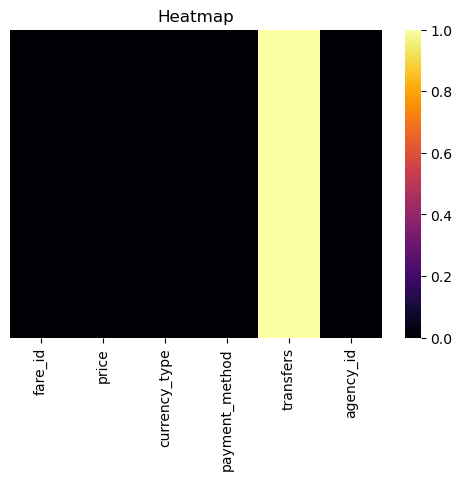

In [19]:
# shows null values in matrix format

plt.figure(figsize=(6,4))
sns.heatmap(fare_attribute.isnull(), yticklabels = False, cmap='inferno')
plt.title('Heatmap')
plt.show()

In [20]:
fare_attribute.isnull().sum() 

fare_id            0
price              0
currency_type      0
payment_method     0
transfers         10
agency_id          0
dtype: int64

In [21]:
# shows the percentage of null values in each column

null_percent = fare_attribute.isnull().sum() * 100 / len(fare_attribute)
null_percent

fare_id             0.0
price               0.0
currency_type       0.0
payment_method      0.0
transfers         100.0
agency_id           0.0
dtype: float64

In [22]:
fare_attribute.describe(include = ['object','number'])

,fare_id,price,currency_type,payment_method,transfers,agency_id
count,10,10.000000,10,10.0,0.0,10
unique,10,NaN,1,NaN,NaN,1
top,F_10,NaN,INR,NaN,NaN,HMRL
freq,1,NaN,10,NaN,NaN,10
mean,NaN,36.500000,NaN,1.0,NaN,NaN
std,NaN,16.674998,NaN,0.0,NaN,NaN
min,NaN,10.000000,NaN,1.0,NaN,NaN
25%,NaN,26.250000,NaN,1.0,NaN,NaN
50%,NaN,37.500000,NaN,1.0,NaN,NaN
75%,NaN,48.750000,NaN,1.0,NaN,NaN


In [23]:
fare_rule= pd.read_csv('fare_rules.txt')
fare_rule.head()

,origin_id,destination_id,fare_id
0,NAG,NAG,F_10
1,UPL,NAG,F_10
2,STD,NAG,F_15
3,NGR,NAG,F_15
4,HSG,NAG,F_25


### Metadata of 'fare_rule' DataFrame:
1. **origin_id:** Identifier for the starting zone or station.
2. **destination_id:** Identifier for the ending zone or station.
3. **fare_id:** Unique identifier linking to the fare_attribute table.

In [25]:
fare_rule_data = fare_rule.copy()

In [26]:
fare_rule.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   origin_id       3481 non-null   object
 1   destination_id  3481 non-null   object
 2   fare_id         3481 non-null   object
dtypes: object(3)
memory usage: 81.7+ KB


In [27]:
fare_rule.isnull().sum() 

origin_id         0
destination_id    0
fare_id           0
dtype: int64

In [28]:
fare_rule.describe(include = 'object')

,origin_id,destination_id,fare_id
count,3481,3481,3481
unique,59,59,10
top,NAG,NAG,F_40
freq,59,59,774


In [29]:
fare_rule.to_csv('fare_rule.csv', index = False) 

In [30]:
route = pd.read_csv('routes.txt')
route.head()

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color,route_sort_order
0,RED,HMRL,C1_RED,Miyapur - LB Nagar - Miyapur - C1,1,E31E24,FFFFFF,1
1,GREEN,HMRL,C2_GREEN,JBS Parade Ground - MG Bus Station - JBS Parad...,1,009846,000000,2
2,BLUE,HMRL,C3_BLUE,Nagole - Raidurg - Nagole - C3,1,007ABB,000000,3


### Metadata of 'route' DataFrame:
1. **route_id:** Unique identifier for a specific route.
2. **agency_id:** Identifier linking the route to agency.
3. **route_short_name:** Short name for the route.
4. **route_long_name:** Full name of the route.
5. **route_type:** Type of transit used on the route, metro.
6. **route_color:** Color associated with the route.
7. **route_text_color:** Text color used with the route color for visibility.
8. **route_sort_order:** Indicates the order in which the routes should be displayed.

In [32]:
route_data = route.copy()

In [33]:
route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   route_id          3 non-null      object
 1   agency_id         3 non-null      object
 2   route_short_name  3 non-null      object
 3   route_long_name   3 non-null      object
 4   route_type        3 non-null      int64 
 5   route_color       3 non-null      object
 6   route_text_color  3 non-null      object
 7   route_sort_order  3 non-null      int64 
dtypes: int64(2), object(6)
memory usage: 324.0+ bytes


In [34]:
route.to_csv('route.csv', index = False) 

In [35]:
stop_time = pd.read_csv('stop_times.txt')
stop_time.head()

,trip_id,stop_sequence,stop_id,arrival_time,departure_time,timepoint
0,SA_101482,1,MGB3,05:59:40,06:00:00,1
1,SA_101482,2,SUB1,06:01:26,06:01:41,1
2,SA_101482,3,NAR1,06:03:22,06:03:37,1
3,SA_101482,4,CDP1,06:05:08,06:05:23,1
4,SA_101482,5,RTC1,06:06:36,06:06:51,1


### Metadata of 'stop_time' DataFrame:
1. **trip_id:** Unique identifier linking the stop times to trip.
2. **stop_sequence:** The order in which the stops are visited during the trip.
3. **stop_id:** Unique identifier linking to a specific stop location.
4. **arrival_time:** Scheduled time when the vehicle arrives at the stop.
5. **departure_time:** Scheduled time when the vehicle departs from the stop.
6. **timepoint:** Indicates if the exact stop time is strictly adhered (1 = exact, 0 = approximate).

In [37]:
stop_time_data = stop_time.copy()

In [38]:
stop_time.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60776 entries, 0 to 60775
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   trip_id         60776 non-null  object
 1   stop_sequence   60776 non-null  int64 
 2   stop_id         60776 non-null  object
 3   arrival_time    60776 non-null  object
 4   departure_time  60776 non-null  object
 5   timepoint       60776 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.8+ MB


In [39]:
stop_time.isnull().sum()

trip_id           0
stop_sequence     0
stop_id           0
arrival_time      0
departure_time    0
timepoint         0
dtype: int64

In [40]:
stop_time.describe(include = ['object','number'])

,trip_id,stop_sequence,stop_id,arrival_time,departure_time,timepoint
count,60776,60776.000000,60776,60776,60776,60776.0
unique,2797,NaN,117,37595,37991,NaN
top,SU_30753,NaN,RDG2,05:59:30,06:00:00,NaN
freq,27,NaN,1061,15,24,NaN
mean,NaN,12.376168,NaN,NaN,NaN,1.0
std,NaN,7.402849,NaN,NaN,NaN,0.0
min,NaN,1.000000,NaN,NaN,NaN,1.0
25%,NaN,6.000000,NaN,NaN,NaN,1.0
50%,NaN,12.000000,NaN,NaN,NaN,1.0
75%,NaN,19.000000,NaN,NaN,NaN,1.0


In [41]:
stop = pd.read_csv('stops.txt')
stop.head()

,stop_id,stop_name,stop_lat,stop_lon,zone_id,location_type,parent_station,platform_code
0,MYP,Miyapur,17.496545,78.373026,MYP,1,NaN,NaN
1,MYP1,Miyapur,17.496545,78.373026,MYP,0,MYP,1.0
2,MYP2,Miyapur,17.496545,78.373026,MYP,0,MYP,2.0
3,JNT,JNTU College,17.498704,78.388867,JNT,1,NaN,NaN
4,JNT1,JNTU College,17.498704,78.388867,JNT,0,JNT,1.0


### Metadata of 'stop' DataFrame:
1. **stop_id:** Unique identifier for a specific stop location.
2. **stop_name:** The name of the stop.
3. **stop_lat:** Latitude coordinate of the stop location.
4. **stop_lon:** Longitude coordinate of the stop location.
5. **zone_id:** Identifier for the fare zone associated with the stop name.
6. **location_type:** Indicates the type of stop (0 = stop, 1 = station, 2 = entrance/exit).
7. **parent_station:** Identifier for the parent station if the stop is part of a larger station.
8. **platform_code:** Code identifying the platform at the stop.

In [43]:
stop_data = stop.copy()

In [44]:
stop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stop_id         705 non-null    object 
 1   stop_name       705 non-null    object 
 2   stop_lat        705 non-null    float64
 3   stop_lon        705 non-null    float64
 4   zone_id         172 non-null    object 
 5   location_type   705 non-null    int64  
 6   parent_station  648 non-null    object 
 7   platform_code   117 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 44.2+ KB


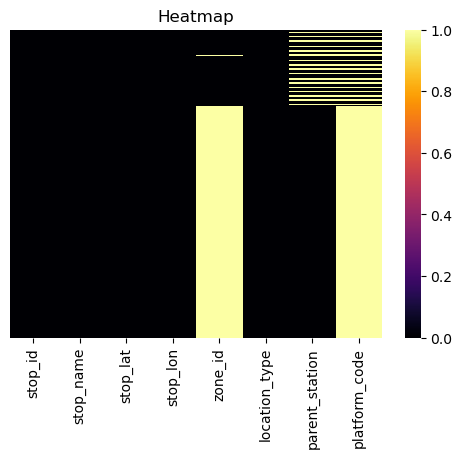

In [45]:
plt.figure(figsize=(6,4))
sns.heatmap(stop.isnull(), yticklabels = False, cmap='inferno')
plt.title('Heatmap')
plt.show()

In [46]:
stop.isnull().sum()

stop_id             0
stop_name           0
stop_lat            0
stop_lon            0
zone_id           533
location_type       0
parent_station     57
platform_code     588
dtype: int64

#### There are 533 null values in 'zone_id' column, 57 nulls in 'parent_station' column and 588 nulls in 'platform_code' column respectively.

In [48]:
null_percent = stop.isnull().sum() * 100 / len(stop)
null_percent

stop_id            0.000000
stop_name          0.000000
stop_lat           0.000000
stop_lon           0.000000
zone_id           75.602837
location_type      0.000000
parent_station     8.085106
platform_code     83.404255
dtype: float64

In [49]:
stop.describe(include = ['object','number'])

,stop_id,stop_name,stop_lat,stop_lon,zone_id,location_type,parent_station,platform_code
count,705,705,705.000000,705.000000,172,705.000000,648,117.000000
unique,705,588,NaN,NaN,59,NaN,57,NaN
top,MYP,Ameerpet,NaN,NaN,MYP,NaN,PRG,NaN
freq,1,5,NaN,NaN,3,NaN,20,NaN
mean,NaN,NaN,17.424423,78.473332,NaN,1.587234,NaN,1.589744
std,NaN,NaN,0.031775,0.046257,NaN,0.758367,NaN,0.658549
min,NaN,NaN,17.349350,78.372410,NaN,0.000000,NaN,1.000000
25%,NaN,NaN,17.400634,78.438864,NaN,2.000000,NaN,1.000000
50%,NaN,NaN,17.430168,78.483420,NaN,2.000000,NaN,2.000000
75%,NaN,NaN,17.443320,78.499809,NaN,2.000000,NaN,2.000000


In [50]:
trip = pd.read_csv('trips.txt')
trip.head()

,service_id,route_id,trip_id,direction_id,trip_headsign,block_id
0,SA,GREEN,SA_101482,0,JBS Parade Ground,SA_20301
1,SA,GREEN,SA_101483,1,Mahatma Gandhi Bus Station,SA_20301
2,SA,GREEN,SA_101484,0,JBS Parade Ground,SA_20101
3,SA,GREEN,SA_101485,1,Mahatma Gandhi Bus Station,SA_20101
4,SA,GREEN,SA_101486,0,JBS Parade Ground,SA_20201


### Metadata of 'trip' DataFrame:
1. **service_id:** Unique identifier linking the trip to a service.
2. **route_id:** Unique identifier linking the trip to route.
3. **trip_id:** Unique identifier for a trip.
4. **direction_id:** Indicates the direction of travel for the trip (0 = outbound, 1 = inbound).
5. **trip_headsign:** The destination displayed on the vehicle.
6. **block_id:** Identifier linking multiple trips that are operated by the same vehicle.

In [52]:
trip_data = trip.copy()

In [53]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   service_id     2797 non-null   object
 1   route_id       2797 non-null   object
 2   trip_id        2797 non-null   object
 3   direction_id   2797 non-null   int64 
 4   trip_headsign  2797 non-null   object
 5   block_id       2797 non-null   object
dtypes: int64(1), object(5)
memory usage: 131.2+ KB


In [54]:
trip.isnull().sum()

service_id       0
route_id         0
trip_id          0
direction_id     0
trip_headsign    0
block_id         0
dtype: int64

In [55]:
trip.describe(include = ['object','number'])

,service_id,route_id,trip_id,direction_id,trip_headsign,block_id
count,2797,2797,2797,2797.000000,2797,2797
unique,3,3,2797,NaN,9,162
top,WK,BLUE,SA_101482,NaN,Miyapur,WK_20101
freq,1069,1153,1,NaN,570,59
mean,NaN,NaN,NaN,0.504827,NaN,NaN
std,NaN,NaN,NaN,0.500066,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,NaN,1.000000,NaN,NaN


In [56]:
trip.to_csv('trip.csv', index = False) 

## Data Manipulation and Cleaning

In [58]:
# converts start_date and end_date to datetime format

calendar['start_date'] = pd.to_datetime(calendar['start_date'], format='%Y%m%d')
calendar['end_date'] = pd.to_datetime(calendar['end_date'], format='%Y%m%d')
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,WK,1,1,1,1,1,1,1,2024-06-25,2030-01-01
1,SA,0,0,0,0,0,1,0,2024-06-25,2030-01-01
2,SU,0,0,0,0,0,0,1,2024-06-25,2030-01-01


In [59]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   service_id  3 non-null      object        
 1   monday      3 non-null      int64         
 2   tuesday     3 non-null      int64         
 3   wednesday   3 non-null      int64         
 4   thursday    3 non-null      int64         
 5   friday      3 non-null      int64         
 6   saturday    3 non-null      int64         
 7   sunday      3 non-null      int64         
 8   start_date  3 non-null      datetime64[ns]
 9   end_date    3 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(7), object(1)
memory usage: 372.0+ bytes


In [60]:
calendar.describe(include = ['object','number','datetime'])

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
count,3,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3,3
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667,2024-06-25 00:00:00,2030-01-01 00:00:00
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-06-25 00:00:00,2030-01-01 00:00:00
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,2024-06-25 00:00:00,2030-01-01 00:00:00
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2024-06-25 00:00:00,2030-01-01 00:00:00
75%,NaN,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,2024-06-25 00:00:00,2030-01-01 00:00:00
max,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2024-06-25 00:00:00,2030-01-01 00:00:00


In [61]:
calendar.to_csv('calendar.csv', index = False)

In [62]:
# convert arrival_time and departure_time to time format

stop_time['arrival_time'] = pd.to_datetime(stop_time['arrival_time'], format='%H:%M:%S').dt.time
stop_time['departure_time'] = pd.to_datetime(stop_time['departure_time'], format='%H:%M:%S').dt.time
stop_time.head()

,trip_id,stop_sequence,stop_id,arrival_time,departure_time,timepoint
0,SA_101482,1,MGB3,05:59:40,06:00:00,1
1,SA_101482,2,SUB1,06:01:26,06:01:41,1
2,SA_101482,3,NAR1,06:03:22,06:03:37,1
3,SA_101482,4,CDP1,06:05:08,06:05:23,1
4,SA_101482,5,RTC1,06:06:36,06:06:51,1


In [63]:
stop_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60776 entries, 0 to 60775
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   trip_id         60776 non-null  object
 1   stop_sequence   60776 non-null  int64 
 2   stop_id         60776 non-null  object
 3   arrival_time    60776 non-null  object
 4   departure_time  60776 non-null  object
 5   timepoint       60776 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.8+ MB


In [64]:
stop_time.describe(include = ['object','number'])

,trip_id,stop_sequence,stop_id,arrival_time,departure_time,timepoint
count,60776,60776.000000,60776,60776,60776,60776.0
unique,2797,NaN,117,37595,37991,NaN
top,SU_30753,NaN,RDG2,05:59:30,06:00:00,NaN
freq,27,NaN,1061,15,24,NaN
mean,NaN,12.376168,NaN,NaN,NaN,1.0
std,NaN,7.402849,NaN,NaN,NaN,0.0
min,NaN,1.000000,NaN,NaN,NaN,1.0
25%,NaN,6.000000,NaN,NaN,NaN,1.0
50%,NaN,12.000000,NaN,NaN,NaN,1.0
75%,NaN,19.000000,NaN,NaN,NaN,1.0


In [65]:
stop_time.to_csv('stop_time.csv', index = False) 

In [66]:
# drops 'currency_type' and 'transfers' column from 'fare_attribute' DataFrame

fare_attribute.drop(columns=['currency_type','transfers'], inplace=True) 

In [67]:
fare_attribute.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fare_id         10 non-null     object
 1   price           10 non-null     int64 
 2   payment_method  10 non-null     int64 
 3   agency_id       10 non-null     object
dtypes: int64(2), object(2)
memory usage: 452.0+ bytes


In [68]:
fare_attribute.to_csv('fare_attribute.csv', index = False) 

In [69]:
# fills null values in 'parent_station', 'platform_code' and 'zone_id' column using the values from 'stop_id' column

stop['parent_station'] = stop['parent_station'].fillna(stop['stop_id'])
stop['zone_id'] = stop['zone_id'].fillna(stop['stop_id'])
stop['platform_code'] = stop['platform_code'].fillna(stop['stop_id'].str.extract(r'(\d+)$', expand=False).fillna('0'))

In [70]:
# converts 'platform_code' column to numeric format

stop['platform_code'] = pd.to_numeric(stop['platform_code'], errors='coerce')

In [71]:
stop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stop_id         705 non-null    object 
 1   stop_name       705 non-null    object 
 2   stop_lat        705 non-null    float64
 3   stop_lon        705 non-null    float64
 4   zone_id         705 non-null    object 
 5   location_type   705 non-null    int64  
 6   parent_station  705 non-null    object 
 7   platform_code   705 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 44.2+ KB


In [72]:
stop.to_csv('stop.csv', index = False) 